In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
file_url= 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data=pd.read_csv(file_url, skipinitialspace =True)

In [13]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [20]:
data['class'] = data['class'].map({'<=50K':0, '>50K':1})
data['class']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [22]:
obj_list=[]
for i in data.columns:
    if data[i].dtype == 'object':
        obj_list.append(i)
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [23]:
for i in obj_list:
    if data[i].nunique() > 10:
        print(i, data[i].nunique())

education 16
occupation 14
native-country 41


In [26]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [27]:
data.drop('education',axis=1, inplace = True)

In [47]:
country_group = data.groupby('native-country').mean(numeric_only=True)['class']

In [48]:
data = data.merge(country_group, on = 'native-country', how = 'left')

In [49]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [50]:
data.drop('native-country', axis=1, inplace = True)
data = data.rename(columns ={'class_x': 'class', 'class_y': 'native-country'})

In [51]:
data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

In [53]:
data['native-country'] = data['native-country'].fillna(-99)
data['workclass']=data['workclass'].fillna('Private')
data['occupation'] = data['occupation'].fillna('Unknown')

In [62]:
data = pd.get_dummies(data, drop_first=True)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1),data['class'],test_size =0.4)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8195731176741567

In [70]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.8561191585197317

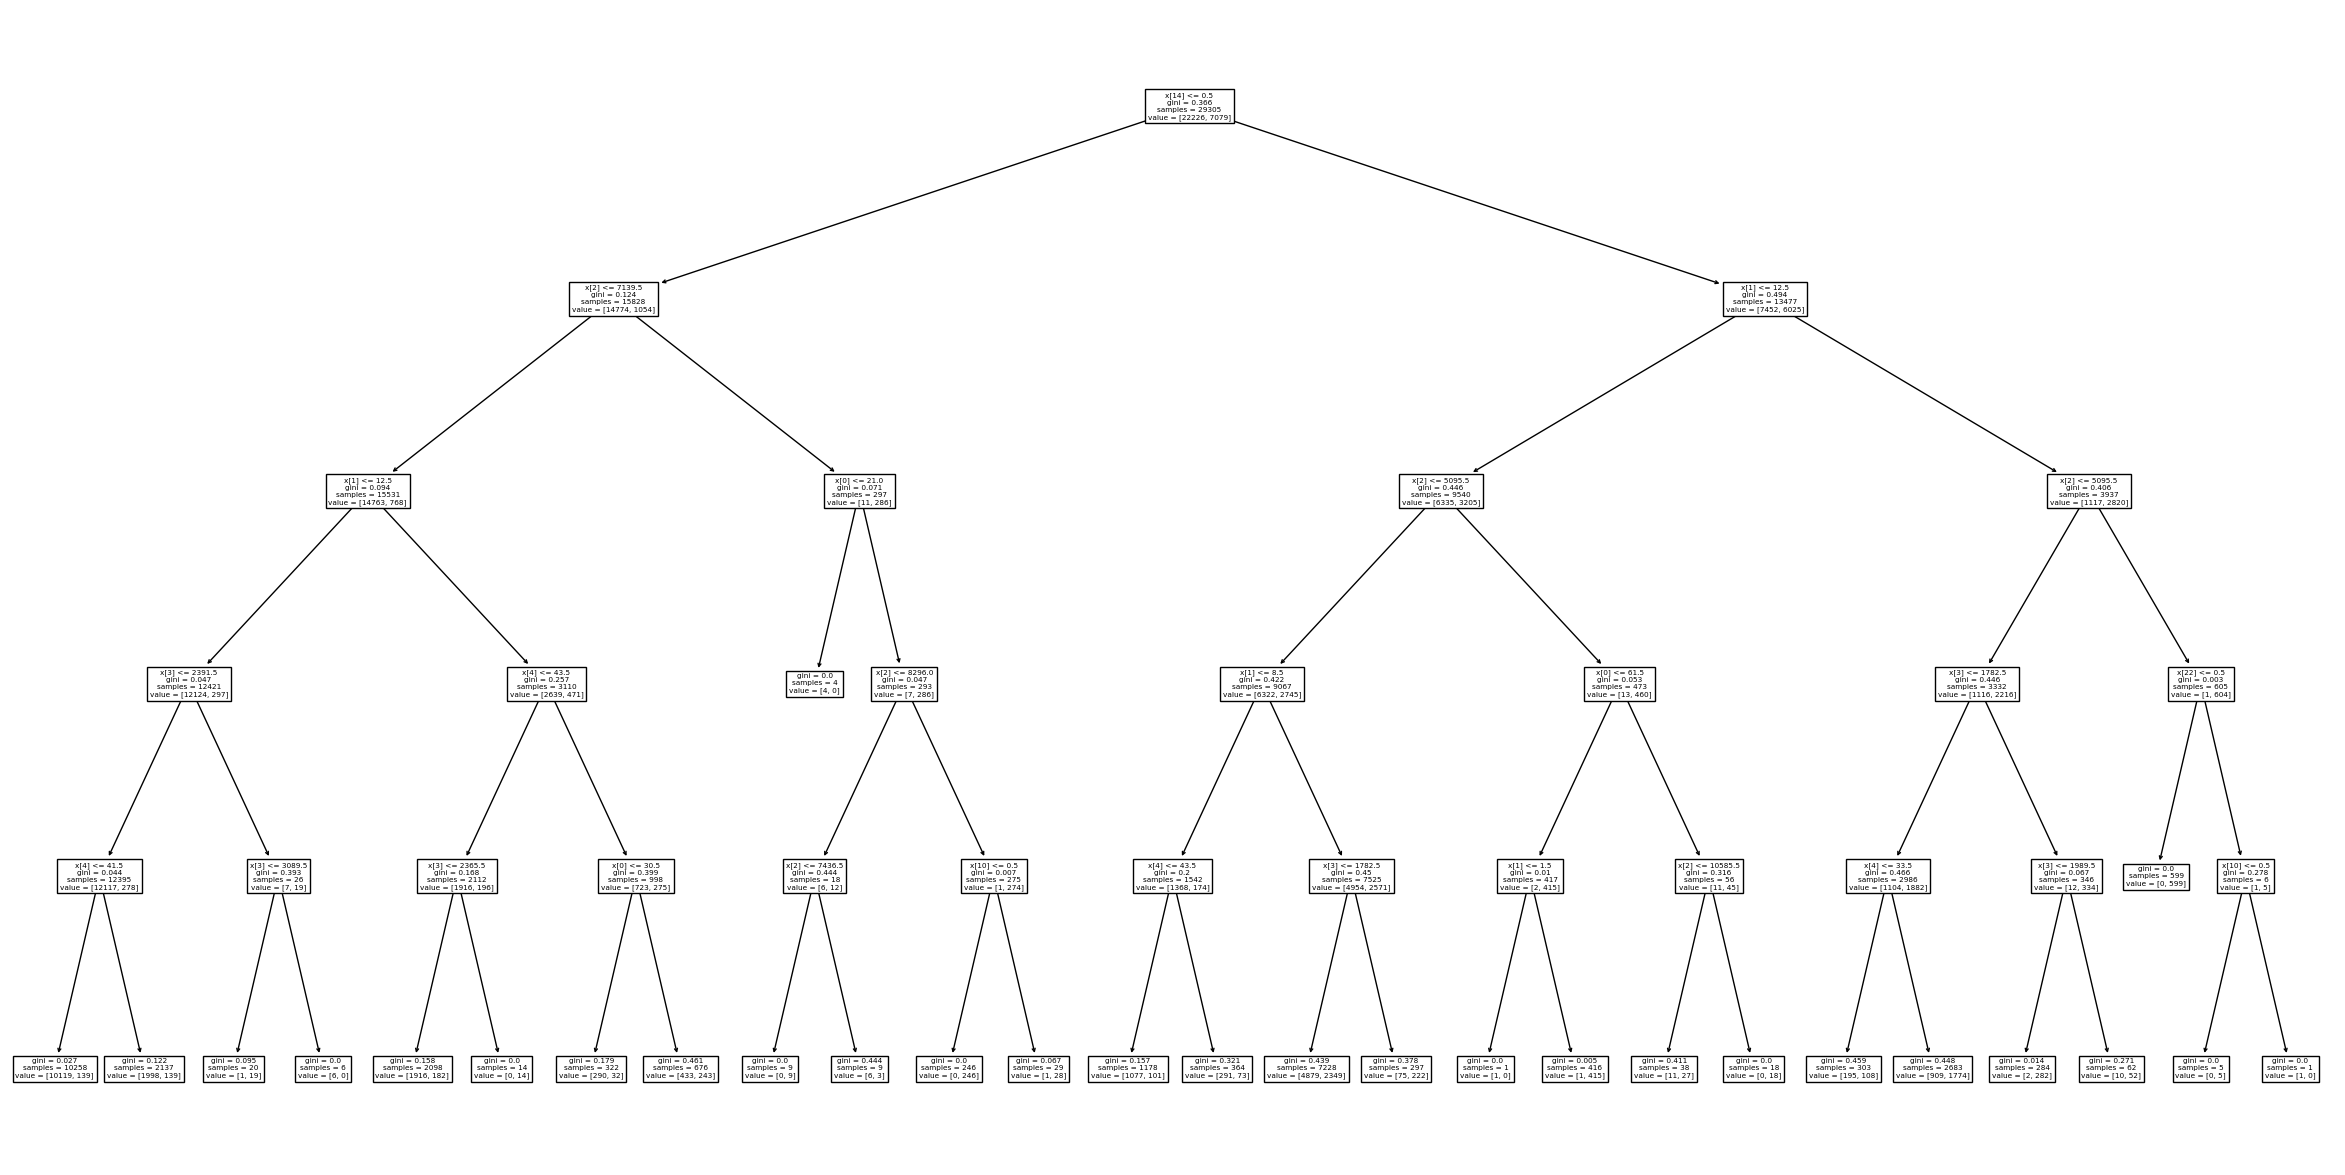

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model)
plt.show()

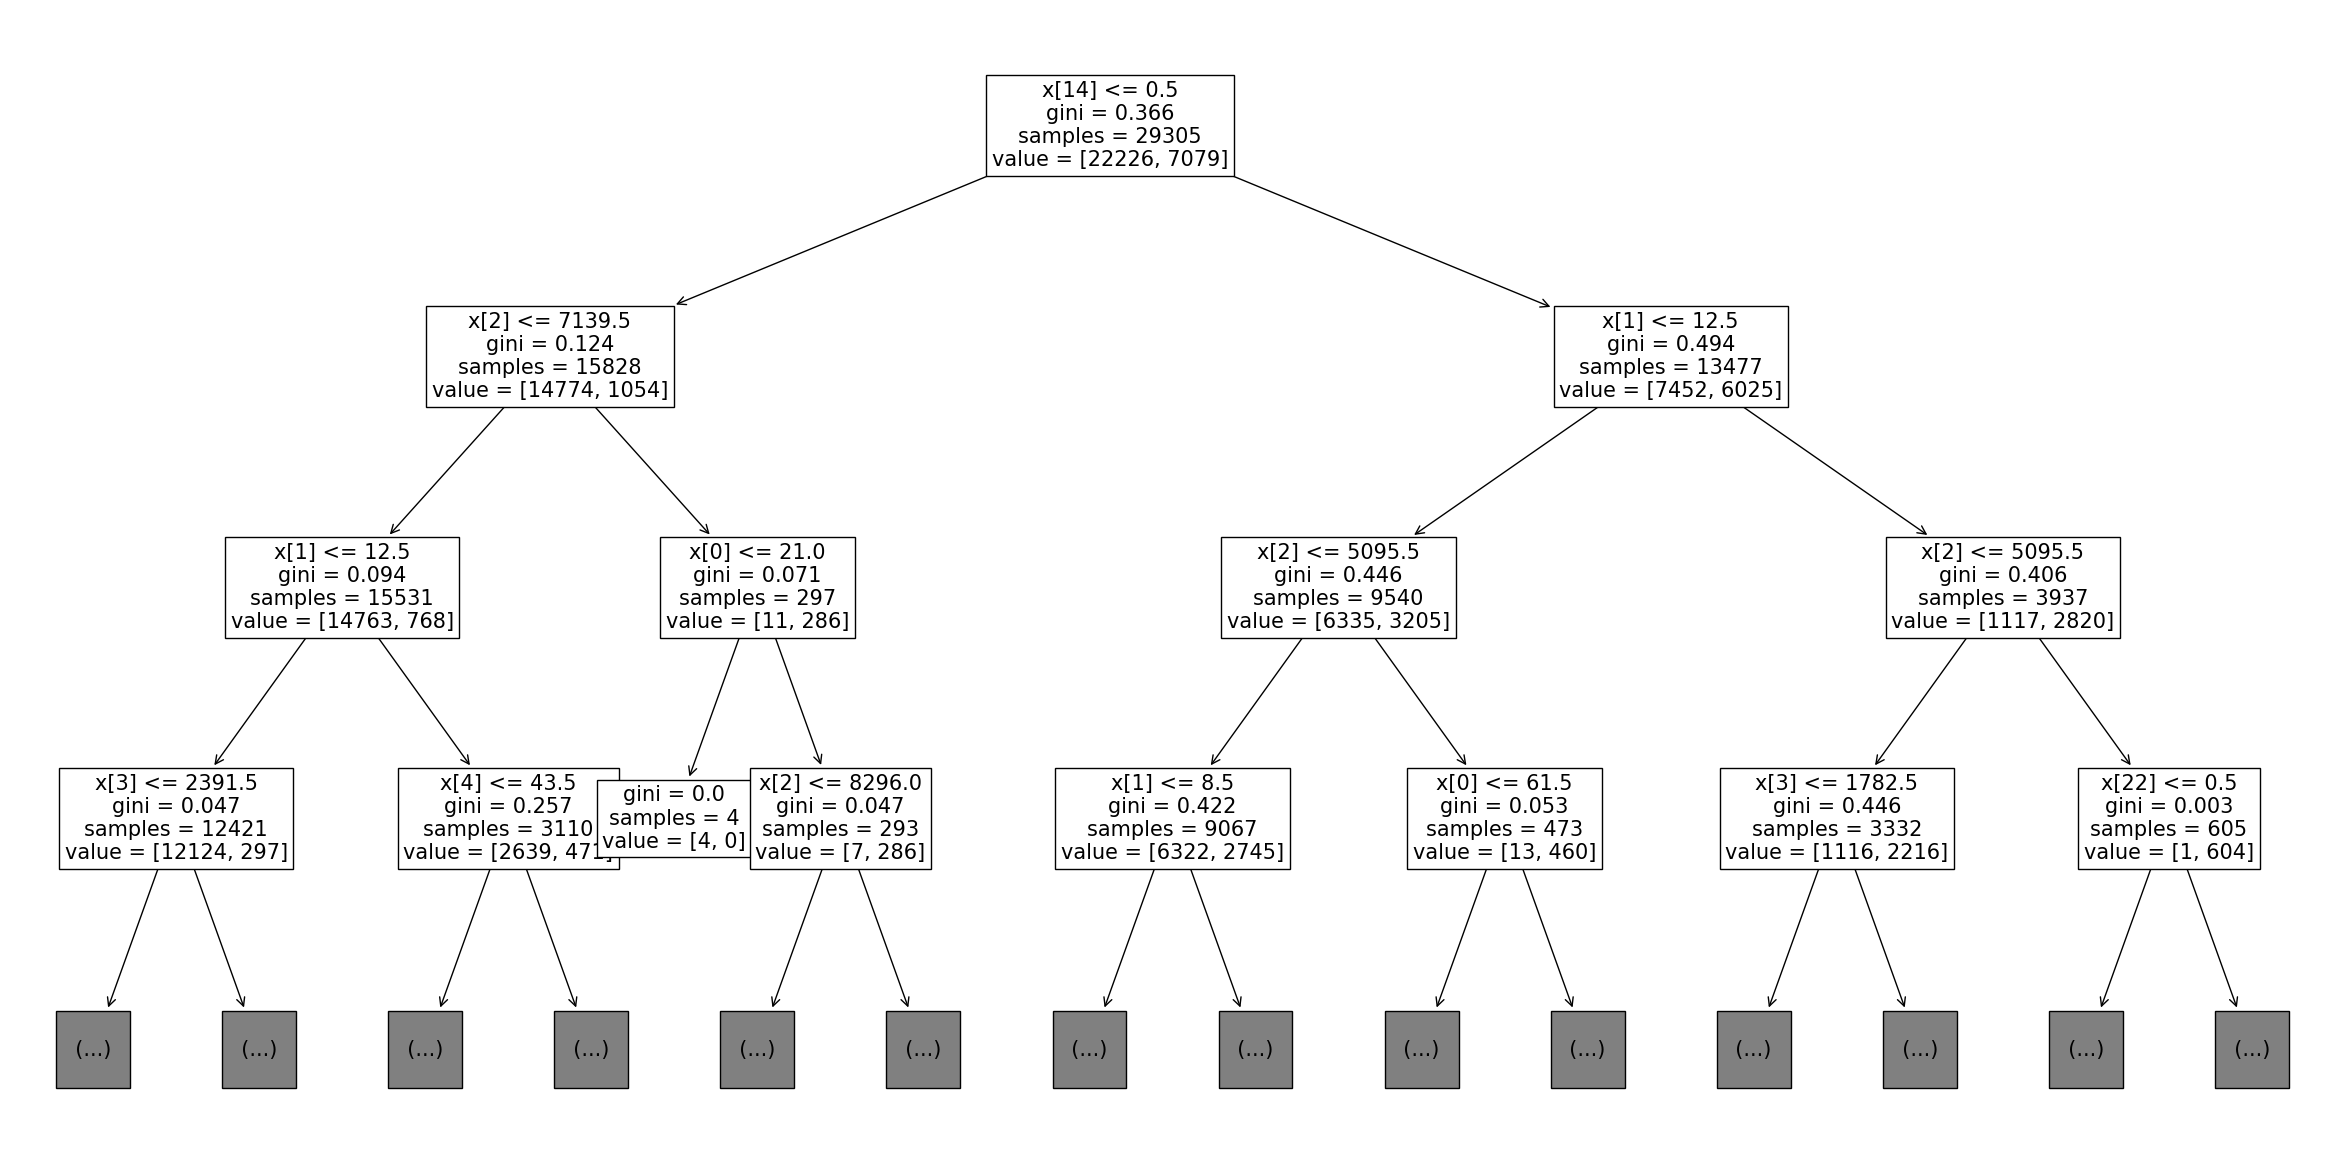

In [74]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth =3, fontsize =15)
plt.show()